
---

---

# **Data Science в медицине [Skill Factory]**   <a id='top'> </a>

---

---



## --- --- ---



### !pip install, import  
>

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


In [1]:
from pprint import pprint
p = print
pp = pprint

In [5]:
### в терменале выполнять
# jupyter --config-dir
# jupyter notebook --generate-config
### posix - либа для linux команд в тетради
# conda install posix

In [6]:
imlibs = """
# from google.colab import drive
# from io import BytesIO
# import gspread
import vk_api
from calendar import day_name
from collections import deque, Counter, OrderedDict
from decimal import *
from operator import itemgetter, attrgetter
from pathlib import Path
from urllib.parse import urlencode
import datetime
import io
import json
import numpy as np
import os
import pandas as pd
import psycopg2
import random
import requests
import subprocess
import sys
import re

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


"""

### exec(imlibs)

In [9]:
install_no_module = """
# pip install psycopg2
# pip install ipython-sql

"""

In [8]:
class lib:
    def cleaner(stringimport: str) -> list:
        """очистка от '' и что содержит из списка ["#"]"""
        return sorted([j for j in set([i if any(item not in i for item in ["#"]) 
                                       else '' for i in stringimport.split('\n')]) if '' != j])
    def instnomod(stringinst):
        print('\u001b[34mУстанавливать нечего!\u001b[0m') if len(stringinst)==0 else None
        for i, mod in enumerate(stringinst):
            subprocess.run(f"pip install {mod}", shell=True)        
            # subprocess.run(['python -m pip ']) ### https://habr.com/ru/companies/otus/articles/475392/
            p( f'\u001b[31m{i} установка завершена - {mod}\u001b[0m'  )

"""import из стринги выше, если чтото нет то вывести в список """
no_module = []
for i, j in enumerate( lib.cleaner(imlibs) ):
    try: exec(j); p(i+1, j) 
    except Exception as err: p( f'\u001b[31m{j} | {err}\u001b[0m'  ); no_module.append(str(err));\
        p(f'\u001b[34mОтсутствующие: {no_module}\u001b[0m')
lib.instnomod(lib.cleaner(install_no_module)) # Установить того что нет?

1 from calendar import day_name
2 from collections import deque, Counter, OrderedDict
3 from decimal import *
4 from operator import itemgetter, attrgetter
5 from pathlib import Path
6 from urllib.parse import urlencode
7 import datetime
8 import io
9 import json
10 import matplotlib.pyplot as plt
11 import numpy as np
12 import os
13 import pandas as pd
14 import plotly
15 import plotly.express as px
16 import psycopg2
17 import random
18 import re
19 import requests
20 import seaborn as sns
21 import subprocess
22 import sys
import vk_api | No module named 'vk_api'
Отсутствующие: ["No module named 'vk_api'"]
0 установка завершена - pip install ipython-sql



### fu |set option
>pd np sns ... 

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


In [10]:
def info_toDF(df0):
    import io
    df = df0.copy()
    df.columns = [j.replace(' ','_') for j in df.columns]
    buffer = io.StringIO()
    df.info(buf=buffer)
    s = buffer.getvalue()
    info_df = pd.DataFrame( [line.split() for line in s.splitlines()[3:-2]] ) .fillna('') .drop(0, axis=1)
    info_df.columns = info_df.loc[0].values
    info_df = info_df.iloc[2:]
    info_df['Non-Null'] = info_df['Non-Null'].astype(int)
    info_df['Null'] = df0.shape[0] - info_df['Non-Null']
    info_df['% Non-Null'] = (info_df['Non-Null'] * 100) / df0.shape[0] 
    return info_df .set_index('Column')

In [11]:
# pandas 
pd.set_option('display.min_rows', 5)  
pd.set_option('display.max_columns', 500)  
pd.set_option('display.max_rows', 30)
pd.options.display.float_format = '{:,.4f}'.format
# numpy
np.set_printoptions(threshold=np.inf) # np.set_printoptions(threshold=sys.maxsize)


sns.set(rc={'figure.figsize':(8,3)})


### google.colab import drive
>

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
# conda -V or conda --version to get the conda version.
# python -V or python --version to get the python version.
# conda list anaconda$ to get the Anaconda version.
# conda list to get the Name, Version, Build & Channel details of all the packages installed (in the current environment).
# conda info to get all the current environment details.
# conda info --envs To see a list of all your environments

Первый метод:
Если нужно просто обновить python, то достаточно команды "conda update python"

Если нужно обновить всю Anaconda, то "conda update anaconda"

Если нужна какая-то конкретная версия, например 3.9, то необходимо указать ее:

conda install python=3.9

Второй метод:

Создайте отдельное окружение:

conda create --name py39 python=3.9

P.S. лучше всего использовать именно этот метод



In [14]:
# !conda -V
# !conda update python
# !python -V
# https://docs.anaconda.org/free/anaconda/allpkglists/
# https://repo.anaconda.com/archive/
# conda 22.9.0


### Markdown
>pd np sns ... 

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


+ элемент 1

- элемент 2

* элемент ...



1. элемент 1

2. элемент 2

  2.1. элемент 3

  2.2. элемент 3

3. элемент 4



```python

lst = [10, 34, 21, 21, 3]

summa = sum(lst)

```


> Цитируемый текст



Пусть задано выражение:

$$a = b +c,$$

где $a=0$

$\alpha$ — 
$\gamma$ — 
$\sigma$ — 

$a^2$ — 
$b_{ij}$ — 
$w^{ij}_n$ — 









In [15]:
# один символ — для наклонного текста (_italic_, *italic*);
# два символа — для жирного текста (__strong__, **strong**);
# три — для наклонного и жирного одновременно (***жирный и наклонный***).

# # Заголовок h1
# ## Заголовок h2
# ### Заголовок h3
# #### Заголовок h4
# ##### Заголовок h5
# ###### Заголовок h6
# ---
# #  Заголовок h1 </center>

# без подсказки — [текст ссылки](http://example.com/link);
# c подсказкой — [текст ссылки](http://example.com/link "Подсказка").
# Для отображения изображений перед квадратными скобками ставится восклицательный знак:
# ![](https://i.imgur.com/3uj9teq.png)
# <img src=https://i.imgur.com/3uj9teq.png width=500px height=30%>





### pip (pip freeze)

 


зафиксировать версии библиотеки, которые использовались в проекте.

Для этого существует несколько подходов. Мы рассмотрим подход через менеджер пакетов pip.

Можно зафиксировать версии через pip командой pip freeze > requirements.txt.

В результате выполнения команды в папке проекта появится файл requirements.txt, где будут перечислены все версии библиотек, которые сейчас установлены в окружении.

?
Как перенести эти версии библиотек на другой компьютер, чтобы наш проект работал на нём?

Для этого необходимо использовать команду 

pip install -r requirements.txt.

В результате выполнения этой команды будут установлены все библиотеки и зависимости, которые использовались в нашем проекте.

Кроме Conda и pip freeze, существуют более продвинутые способы управления пакетами:

Poetry
Этот инструмент сейчас набирает популярность, однако мы не будем рассматривать его в этом курсе — при желании вы можете изучить его самостоятельно.

Docker Desktop
Этот инструмент позволяет полностью изолировать проект (вплоть до операционной системы). О нём мы ещё будем говорить в дальнейшем.

---

<span style="font-size:0.8em;"> [TOC](#mod1) </span>

### Git

---

<span style="font-size:0.8em;"> [TOC](#mod1) </span>



> Типичная схема действий на работе в компании https://www.youtube.com/watch?v=6cUJFdeaQJM&t=42s https://www.youtube.com/watch?v=pToZnXuGMh0&t=805s
> 30 команд Git, необходимых для освоения интерфейса командной строки Git https://habr.com/ru/companies/ruvds/articles/599929/

* Создали в гитлабе проект 
* Склонировали по ссх (ssh keygen)  пароль шмароль... !ssh-keygen -t rsa -b 4096 публичный ssh to github 
* git clone ...ссылка с гита... (без ковычек) пароль шмароль...
* скопируется папка с названием самого проекта на гите .gitignore будет сразу автоматом создан при создании проекта на гитхабе так же как и README.md
* если нет то создать в линукс фаил - touch .gitignore (!echo .ipynb_checkpoints >> .gitignore запись в конец файла что антрекать)
* git status -s - on branch master 
* git pull - обновить стянуть заново  
* git log  - комиты и тд
* git branch - все ветки и текущая подсвечена
* git branch new_dir/new_project - создать новую ветку new_dir/new_project
* git checkout new_dir/new_project - перейти в ветку
* git status -s (снова) - создаем файлы пишем чтото потом проверяем статус
* git diff - посмотреть что именно изменилось 
* git add . - точка значит все изменения добавить все файлы либо git add name_file.py
* git status (снова) - проверили что добавили 
* git commit -m "First commit" - добавили комит в кавычках сообщение если -m нет то откроется vim
* git branch - проверили что работаем не в главной ветки и собираемся ее (branch new_dir/new_project) добавить в главную (origin)
* git push origin new_dir/new_project - запушить в origin нашу ветку new_dir/new_project
* пароль шмароль... ссылка... переходим на нее (to create merge requests for new_dir/new_project)
* Submit merge request (Assignee - заассаиним типов кто проверит и подтвердит)
* там внесли изменения (команда чтото поменяла но у меня этого в моей ветке проекта нового нет и в главной ветке тоже нет поэтому надо обновить)
* git checkout . - отменить все изменения (те что в git status красным если надо откатить что бы не выводил изменения)
* git checkout master - перешли в главную (git branchи проверили что на ветке мастер)
* * main — ветка, созданная GitHub автоматически (здесь хранятся файлы .gitignore и README.md);
* * master — ветка, созданная системой контроля версий (мы работали в ней).

* git pull - обновить измнения в мастер (но в нашем новом проекте еще все без изменений! надо там обновить тоже ) а для этого перейдем в свою новую ветку и сделаем мерж 
* git checkout new_dir/new_project - перешли в новую ветку что бы ее обновить вмержив мастер...
* git merge master








In [16]:
# !ssh-keygen -t rsa -b 4096
# !git clone git@github.com:ПРОЕКТ/ПРОЕКТ.git 
# !echo .ipynb_checkpoints >> .gitignore 
# !echo .virtual_documents >> .gitignore 
# !git status 
# !git pull 
# !git log 
# !git branch 
# !git branch new_dir/new_project 
# !git checkout new_dir/new_project
# !git status
# !git diff 
# !git add . 
# !git status -s
# !git commit -m "First commit" 
# !git branch 
# !git push origin new_dir/new_project 
# # пароль шмароль... ссылка... переходим на нее (to create merge requests for new_dir/new_project)
# # Submit merge request (Assignee - заассаиним типов кто проверит и подтвердит)
# # там внесли изменения (команда чтото поменяла но у меня этого в моей ветке проекта нового нет и в главной ветке тоже нет поэтому надо обновить)
# !git checkout . - отменить все изменения (те что в git status красным если надо откатить что бы не выводил изменения)
# !git checkout master 
# !git pull 
# !git checkout new_dir/new_project 
# !git merge master

### None vs np.non

---

<span style="font-size:0.8em;"> [TOC](#mod1) </span>


In [17]:
if not None:
    print('qwe')
    
print( not None == True, not None is True )
# True True
print( None == False, None is False )
# False False
qwe = [] 
not qwe
# True

# Отличие 1. None является отдельным объектом типа NoneType. np.nan — это отдельный представитель класса float:
print(type(None))
# <class 'NoneType'>
print(type(np.nan))
# <class 'float'>
type(np.NaN), type(np.nan)
# (float, float)

# Отличие 2. None могут быть равны друг другу, а np.nan — нет:
print(None == None)
# True
print(np.nan == np.nan)
# False
print(None == np.nan)
# False

# Как вы помните, чтобы грамотно сравнить что-либо с None, 
# необходимо использовать оператор is. Это ещё более актуально для np.nan. Однако None даже через is не является эквивалентным np.nan:
print(None is None)
# True
print(np.nan is np.nan)
# True
print(np.nan is None)
# False
print(np.isnan(np.nan))
# True


qwe
True True
False False
<class 'NoneType'>
<class 'float'>
True
False
False
True
True
False
True



## --- --- ---


<a id='mod1'> </a>
## **Теория баз данных. Основы SQL**

>



<a id='toc'> </a>
> Table of Contents TOC 

 * [1 УРОК ](#1)
 * [2 УРОК ](#2)
 * [3 УРОК ](#3)
 * [4 УРОК ](#4)
 * [5 УРОК ](#5)
 * [6 УРОК ](#6)
 * [7 УРОК ](#7)
 * [8 УРОК ](#8)
   * [под урок](#9)

---

---


<a id='1'> </a>

### Модуль 1. Введение в базы данных

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


<a id='1'> </a>

#### _Базы данных_

> https://tproger.ru/translations/sql-nosql-database-models



---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>

##### База данных (БД) 
 это организованная структура для хранения, изменения и обработки взаимосвязанной информации. Обычно базы данных используют для взаимодействия с большими объёмами данных. Практически ни одна большая компания (от интернет-магазинов до банков) сейчас не обходится без использования баз данных.


Какие базы данных существуют?

1
##### Реляционные 
базы данных. В них данные хранятся в виде связанных таблиц. Связанные таблицы — это таблицы, в которых мы явно видим зависимость данных одной таблицы от другой. Например, в одной мы храним данные о сотрудниках, а во второй — их зарплату.


2
##### Нереляционные 
базы данных. В них данные хранятся иначе, например, в формате ключ-значение или в виде дерева.



##### Модели баз данных
Каждая СУБД реализует одну из моделей баз данных для логической структуризации используемых данных. Эти модели являются главным критерием того, как будет работать и управлять информацией приложение. Существует несколько таких моделей, среди которых самой популярной является реляционная.

Хотя она и является весьма мощной и гибкой, есть ситуации, решения которых она предложить не может. Тут на помощь придёт сравнительно новая модель, называемая NoSQL. Она набирает популярность и предлагает весьма интересные решения и дополнительный функционал. Из-за того, что эти системы не используют строгую структуризацию данных, они предлагают большую свободу действий при обработке информации.

##### Реляционная модель
Представленная в 70-х, реляционная модель предлагает математический способ структуризации, хранения и использования данных. Отношения (англ. relations) дают возможность группировки данных как связанных наборов, представленных в виде таблиц, содержащих упорядоченную информацию (например, имя и адрес человека) и соотносящих значения и атрибуты (его номер паспорта).

Благодаря десятилетиям исследований и разработки РСУБД работают производительно и надёжно. В сочетании с большим опытом использования администраторами реляционные базы данных стали выбором, гарантирующим защиту информации от потерь.

Несмотря на строгие принципы формирования и обработки данных, РСУБД могут быть весьма гибкими, если приложить немного усилий.

##### Безмодельный (NoSQL) подход
NoSQL-способ структуризации данных заключается в избавлении от ограничений при хранении и использовании информации. Базы данных NoSQL, используя неструктуризированный подход, предлагают много эффективных способов обработки данных в отдельных случаях (например, при работе с хранилищем текстовых документов).

##### Популярные СУБД
В этой статье мы опишем вам парадигмы основных решений для работы с базами данных. Хотя точные числа привести очень сложно, в большинстве случаев выбор делается в пользу реляционной модели или NoSQL. Прежде чем мы сравним их, давайте узнаем, что находится “под капотом” у каждой из них.

##### РСУБД
Реляционные системы управления базами данных берут своё название от реализуемой модели — реляционной. Сейчас они остаются, да и ещё какое-то время будут, самым популярным выбором для надёжного, безопасного и производительного хранения данных.

РСУБД требуют чётких и ясных схем — не стоит путать со специфическим определением для PostgreSQL — для работы с данными. Эти рамки, определённые пользователем, задают способ их хранения и использования. Схемы очень похожи на таблицы, столбцы которых отражают порядковый номер и тип информации в каждой записи, а строки — содержимое этих записей.

##### Самыми популярными РСУБД сейчас являются:

SQLite: очень мощная встраиваемая РСУБД.

MySQL: самая популярная и часто используемая РСУБД.

PostgreSQL: самая продвинутая и гибкая РСУБД.
NoSQL-СУБД


##### NoSQL-СУБД 
не используют реляционную модель структуризации данных. Существует много реализаций, рещающих этот вопрос по-своему, зачастую весьма специфично. Эти бессхемные решения допускают неограниченное формирование записей и хранение данных в виде ключ-значение.

В отличие от традиционных РСУБД, некоторые базы данных NoSQL, например, MongoDB, позволяют группировать коллекции данных с другими базами данных. Такие СУБД хранят данные как одно целое. Эти данные могут представлять собой одиночный объект наподобие JSON и вместе с тем корректно отвечать на запросы к полям.

NoSQL базы данных не используют общий формат запроса (как SQL в реляционных базах данных). Каждое решение использует собственную систему запросов.

##### Сравнение SQL и NoSQL
Для того, чтобы прийти к простому и понятному выводу, давайте проанализируем разницу между SQL- и NoSQL-подходами:

Структура и тип хранящихся данных: SQL/реляционные базы данных требуют наличия однозначно определённой структуры хранения данных, а NoSQL базы данных таких ограничений не ставят.


Запросы: вне зависимости от лицензии, РСУБД реализуют SQL-стандарты, поэтому из них можно получать данные при помощи языка SQL. Каждая NoSQL база данных реализует свой способ работы с данными.


Масштабируемость: оба решения легко растягиваются вертикально (например, путём увеличения системных ресурсов). Тем не менее, из-за своей современности, решения NoSQL обычно предоставляют более простые способы горизонтального масштабирования (например, создания кластера из нескольких машин).


Надёжность: когда речь заходит о надёжности, SQL базы данных однозначно впереди.


Поддержка: РСУБД имеют очень долгую историю. Они очень популярны, и поэтому получить поддержку, платную или нет, очень легко. Поэтому, при необходимости, решить проблемы с ними гораздо проще, чем с NoSQL, особенно если проблема сложна по своей природе (например, при работе с MongoDB).


Хранение и доступ к сложным структурам данных: по своей природе реляционные базы данных предполагают работу с сложными ситуациями, поэтому и здесь они превосходят NoSQL-решения.










Если первый пользователь добавляет данные в одну таблицу, а другой в другую, и обе таблицы находятся в одной БД. В такой ситуации добавление отработает так, что для пользователей будет казаться, как будто каждый из них работает отдельно и независимо от своего товарища.


Если данные добавляются или изменяются в рамках одной таблицы, но это разные строки, то ошибки сохранения тоже не будет.


Оба пользователя изменяют данные, притом это конкретные данные на одной и той же строчке одной и той же таблицы. В этом случае будут добавлены данные будут того, кто сохранил последним.


Дальше давайте попробуем разобраться, в чём разница между различными СУБД, и заодно посмотрим, какие они бывают. СУБД можно классифицировать по разному: по модели хранения данных, по степени распределенности и по способу доступа к БД.

##### I

Для начала нужно понять, что модель данных — это некое  абстрактное описание объектов, операторов и взаимосвязей между объектами.

Например, в иерархической модели данных объекты представлены узлами и между ними есть связи, ну и у дерева может быть только один корень. Частным примером этой структуры является дерево бинарного поиска, но в отличие от него, количество дочерних элементов у элемента не должно быть равно двум. А ещё интересно знать, что эта модель была разработана одной из первых, и использовалась в 1960-1970 годах.

Следующей по развитию шла сетевая модель данных, отличающаяся от иерархической тем, что у каждого потомка могло быть несколько родительских объектов. Конкурентоспособной она была в 1975-1980 годах.

##### II

Следующим этапом развития СУБД стали базы, основанные на реляционной модели данных. Во многих источниках обычно используется достаточно сложное описание такой модели, но на самом деле она представляет собой таблицу, которая обладает рядом свойств:

* У нее может не быть строк , но хотя бы один столбец быть обязан.
* На пересечении столбца и строки должно быть только одно значение и оно атомарно (т.е. это минимально допустимая единица информации, при попытке разделить которую нарушится целостность информации. Например, если мы в ячейке храним почтовый индекс, то при попытке разделить на первые три цифры и вторые три цифры будет уже непонятно, что мы храним).
* У каждого столбца должно быть своё уникальное имя.
* Данные в одном столбце всегда одного типа (строки, числа, даты).

##### III По степени распределённости СУБД
По степени распределённости СУБД делятся всего на два типа: 

локальные (размещенные на одном компьютере) и 

распределенные ( находящиеся на двух компьютерах и более).

##### IV  различия по доступу к БД.
Всего есть три типа:

##### Файл-серверные. 
Предполагают наличие в сети сервера (или серверов), на котором хранятся файлы БД. В соответствии с запросами пользователей файлы с файл-сервера передаются на рабочие станции пользователей, где и осуществляется основная часть обработки данных. При этом сам сервер выполняет роль хранилища файлов, не участвуя в обработке самих данных. 
##### Клиент-серверные.
Помимо хранения файлов БД, выполняют бОльшую часть обработки данных. Пользователи обращаются к серверу, сервер принимает запрос и запускает процессы обработки данных. В ответ пользователь получает уже обработанный, в соответствии с запросом, набор данных. Данная технология позволяет избежать передачи по сети больших объемов информации, переложив всю обработку на центральный сервер. 
##### Встраиваемые.
Обычно идут с родительским приложением для хранения его данных локально, не требуют установки и не имеют никакого коллективного использования.


<a id='1'> </a>

#### _НЕреляционные базы данных_

> 



---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>

Мы уже знаем, что реляционные базы данных хранят значения в виде таблицы, и как можно догадаться, нереляционные БД хранят данные в иной форме.

Например, данные могут храниться как:

##### простые пары «ключ–значение» ;
##### JSON; https://www.json.org/json-ru.html
##### документ;
##### граф.

Попробуем разобраться более детально, в чем их отличие. В реляционных таблицах данные ячеек обычно близки по смыслу к объектам в реальном мире. Как вы помните, в примере с транзакциями мы разбирали «почти реальные» счета.

А вот в нереляционных БД объекты хранят скорее в виде иерархических структур, при этом количество атрибутов (тут следует понимать, что в реляционных БД это столбец, а в нереляционных — дополнительная строка при описании объекта) у таких объектов может быть вообще произвольным.

Попробуем разобраться в этом на примере торгового каталога.

В реляционных БД нам надо точно описать данные, которые будут храниться в таблице. Ну или хотя бы минимальный набор, например: название, цена, количество, и уникальный идентификатор на складе.

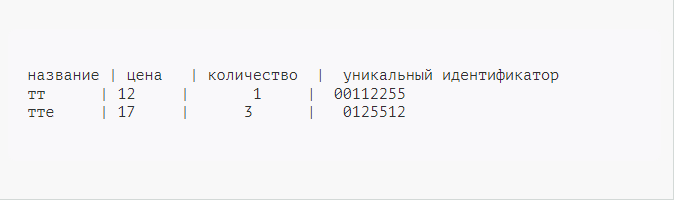

Вроде бы всё выглядит логично, но что, если нам потребуется добавить какие-нибудь дополнительные свойства объектов? Например, спустя время нам потребовалось хранить также вес изделия, либо, если изделие жидкое  —  объем. Да, конечно не сложно изменить таблицу и добавить в неё две дополнительные колонки «вес» и «объем», и если данных нет — записывать NULL.

Хорошо, но что, если спустя время возникнет задача ещё раз расширить БД? И да, при таком устройстве БД она скорее всего возникнет, и со временем разобраться в структуре такой БД будет очень-очень тяжело.

Рассмотрим этот же каталог на примере нереляционной БД. Пусть это будет БД, которая хранит JSON’ы  оптимально для условий нашего примера.

Тогда сами данные будут выглядеть примерно так:

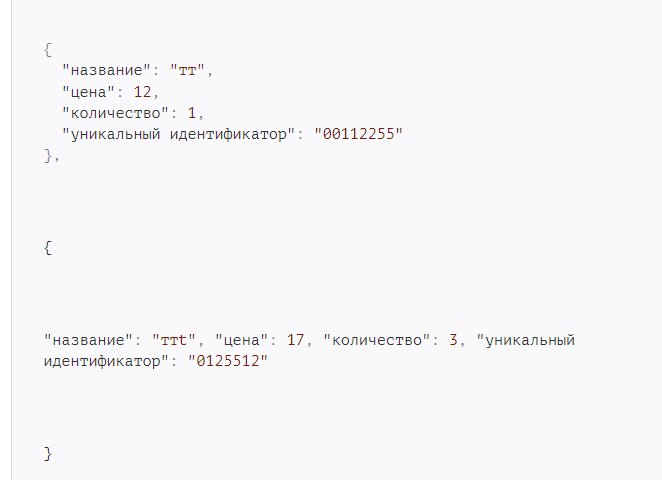

И при возникновении такой же задачи — добавить дополнительные поля к каждому объекту — мы просто берём и сразу передаем эти дополнительные поля, ничего не описывая лишний раз. При этом структура уже будет выглядеть следующим образом:

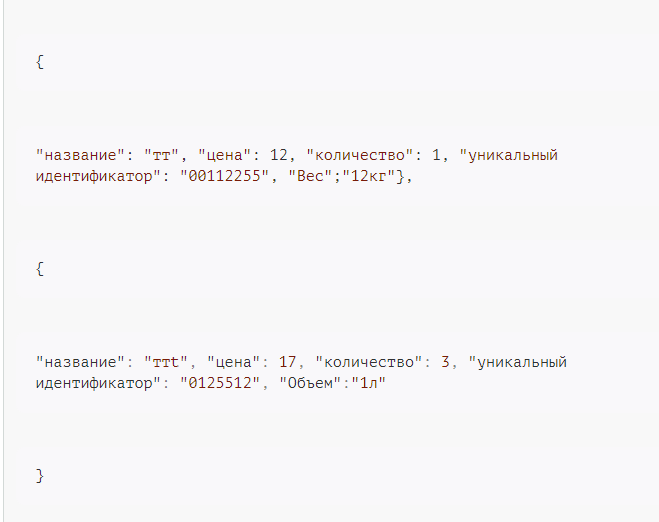

Немного усложним наш пример. На склад поступает коробка, в которой хранятся несколько однотипных объектов. В реляционной БД нам бы пришлось создать таблицу для каждого объекта и таблицу для коробки, а вот в нереляционной БД это можно было бы сделать с помощью вложения одного объекта в другой, и для этого не потребовалось бы никаких дополнительных работ и ресурсов.

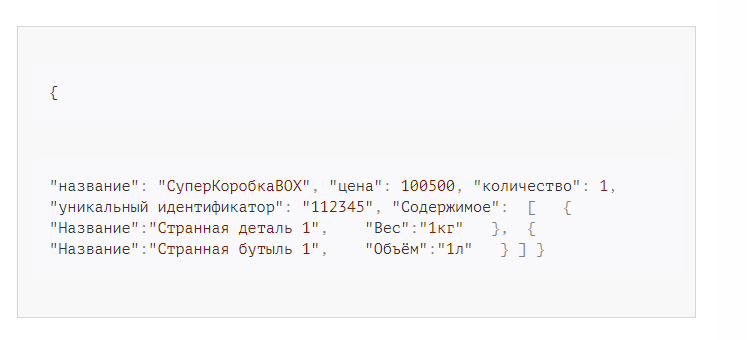

Дальше попробуем разобраться с тем, какие существуют 
##### основные нереляционные БД
, и в чем их принципиальное различие. В зависимости от модели данных, выделяются несколько различных типов систем, которые разберем далее:

 
 
 ключ-значение;
 
 
 семейство столбцов;
 
 
 графовые СУБД;
 
 
 документоориентированные СУБД.





















##### Ключ — значение
При модели «ключ-значение» хранилище представляет собой большую таблицу «ключ-значение». Такой тип является самым простым вариантом нереляционных баз данных. Обычно в таких системах хранят изображения, кэши объектов или используют, когда нужно сделать хорошо масштабируемую БД.

##### Примеры таких хранилищ: Berkeley DB, MemcacheDB[en], Redis, Riak, Amazon DynamoDB.

В большинстве случаев такие хранилища позволяют использовать только самые простые операции: выборка, вставка и удаление. Чтобы изменить значение полностью или частично, приходится полностью переписывать существующее значение. Относительно долгое время занимает запись больших значений.

В основном можно хранить в связке «ключ-значение» , а именно в значении, любые данные. Лишь некоторые хранилища ограничивают максимальный размер значения.

На примере ниже показана таблица, в первой колонке которой мы храним ключ, а во второй — какие-то необходимые нам данные.

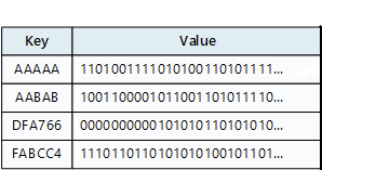

Такие БД в основном используются в приложениях, в которых требуется выполнять поиск на основе одного ключа, а не делать выборку из нескольких таблиц. Кстати одну такую таблицу очень легко масштабировать. Так, например, данные могут оказаться на нескольких узлах.

Redis (Remote Dictionary Server) — это нереляционная структура данных в памяти, используемая в качестве базы данных. Работает с данными ключ-значение. Разработана для максимальной скорости set- и get-запросов. Позволяет нам хранить данные в высокоуровневых структурах данных, таких как строки, хэши, списки, наборы.

Redis достаточно дружелюбен для разработчиков, т.к. поддерживает большинство языков высокого уровня, таких как Java, JavaScript ,Python и C / C ++.

Прежде всего, Redis — это хранилище типа ключ: значение. И самые первые команды, которые все изучают, это команды SET и GET:

##### SET ключ значение 
— записывает строку в ключ. Если ключ до этого был, то он будет перезаписан.

Пример:

SET first 'Hello World'
И получим:

127.0.0.1:6379> SET first 'Hello World'
OK
Также в значении SET мы можем передать время жизни пары:

SET second 'GoodBye World' EX 10  
Данное значение будет доступно в течении 10 секунд после создания, а потом будет удалено. Ведь очень часто в разных сервисах бывает, что нам присылают код, который действителен в течении скажем 40 секунд.

##### Метод GET 
— это получение значения по ключу. Сейчас попробуем получить ранее созданное первое значение:

GET first
Получаем :

127.0.0.1:6379> GET first
"Hello World"
##### DEL 
— это удаление значения по ключу. Попробуем удалить первое значение (first):

DEL first
Вот, что из этого вышло:

127.0.0.1:6379> DEL first
(integer) 1
127.0.0.1:6379> GET first
(nil)

##### Семейство столбцов
Другой моделью является семейство столбцов или столбчатое хранилище. Семейство столбцов можно представить как таблицу, в которых столбцы разделяются на группы или семейства столбцов.

Каждое столбчатое хранилище имеет набор логически связанных столбцов, которые обычно извлекаются или управляются как единое целое. Другие данные, которые используются в других процессах, хранятся отдельно в других столбчатых хранилищах.

В семейство столбцов можно добавлять новые столбцы на любом этапе, а строки могут быть, а могут и не быть. То есть необязательно, чтобы в строках было обязательное значение.

Дальше рассмотрим пример таблицы с двумя семействами столбцов: Identity и Contact Info. Такие таблицы хорошо подходят для хранения данных с различными схемами.

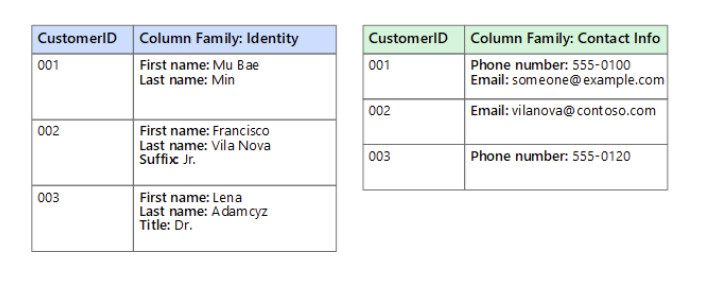

В отличие от БД, ключ — значение, где данные упорядочиваются посредством хэш-кодов, в столбчатых БД упорядочивание происходит с помощью самих значений. Ключ строки рассматривается как первичный индекс, и доступ предоставляется обычно по нему.

Все столбцы хранятся на диске в одном файле. Это очень удобно при считывании больших объемов данных.



##### Графовая СУБД
Как следует из названия, графовые СУБД представлены в виде графов. Они используются в задачах, где есть большое количество данных со связями. Рёбра графа хранимые, и не требуют дополнительных вычислений. Индексы указывают нахождение начальной вершины.

Так БД управляют двумя типами данных — узлы и ребра. И как можно понять, узлы представлены как сущности, а рёбра — как связи между ними. Рёбра или грани могут иметь направление, которое указывает на характер связи. Благодаря таким хранилищам, очень удобно выполнять запросы на сеть ребер или узлов. А также достаточно просто анализировать связи между объектами.

На примере ниже представлен граф. Объектами здесь являются сотрудники и отделы. Ребра указывают на отношение, благодаря чему становится ясно, кто в каком отделе работает и кто кому подчиняется. Это достигается тем, что связи имеют направление или, говоря простым языком, выполнены в виде стрелочек, а не линий.


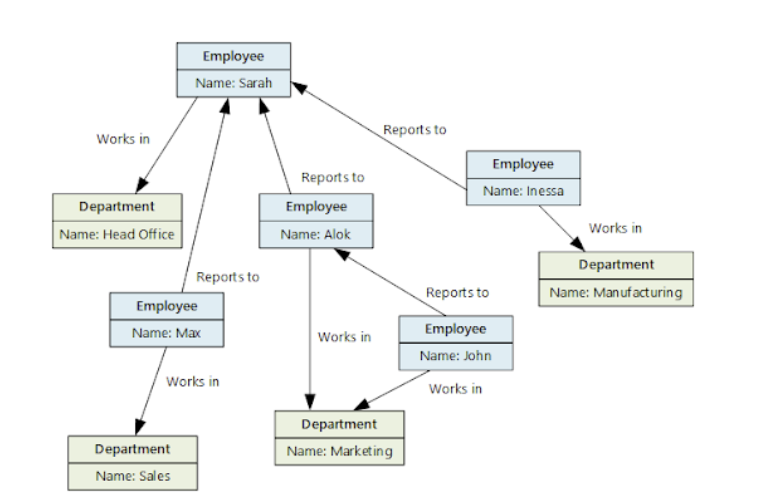

Благодаря такой структуре легко выполнить запросы «кто подчиняется конкретному человеку» или «кто с кем работает в каком отделе». Обычно большинство таких баз данных имеют свой язык запросов, позволяющий очень легко и быстро обходить даже очень большие графы.




##### Документо-ориентированная СУБД
Документоориентированные СУБД разработаны для хранения иерархических структур данных. Они очень похожи на модель ключ-значение. И напоминают пример, где мы рассматривали различие между реляционными и нереляционными БД. Данные обычно хранятся как JSON-значение.

В примере ниже хранятся данные о местонахождении магазинов. При том местонахождение описано по-разному, но СУБД понимает, что это адрес, и нормально воспринимает поиск и сравнение.

    {officeName: "3Pillar Noida", 
           {Street: "B-25", City: "Noida",
           State: "UP", Pincode: "201301"}
        }
        {officeName: "3Pillar Timisoara",
           {Boulevard: "Coriolan Brediceanu No. 10",
           Block: "B, Ist Floor",
           City: "Timisoara", Pincode: "300011"}
        }
        {officeName: "3Pillar Cluj",
           {Latitude: "40.748328",
           Longitude: "-73.985560"}
        }
        
Различие между ключ-значение хранилищем и документо-ориентированным хранилищем в том, что в последнем можно делать поиск не только по ключу, но и по данным. Можно, например, выполнить запрос поиска, где City равно Noida. Такой запрос вернет все документы, которые связаны с этим городом.

Рассмотрим небольшие примеры того, что можно делать документо-ориентированным хранилищем на основе MongoDB.

##### MongoDB — это документо-ориентированная СУБД, которая использует JSON-подобные данные.

Первый пример — вставка нового документа. Можно вставить с использованием метода insert ,он принимает в качестве аргумента JSON-объект. Далее добавляем в БД данные с одним ключом title. А значениями являются названия разных СУБД.

    db.mybase.insert({title: "MongoDB"})
        db.mybase.insert([{title: "MS SQL"}, {title: "Oracle"}])
        
Основной фишкой MongoDB, если можно так сказать, является хранение настолько тяжелых и вложенных JSON’ов, насколько сама конструкция JSON позволяет создать и хранить.

В качестве примера в отдельной базе данных articles создадим набор статей, имеющий название и набор ключевых слов:

    db.articles.insert({title: "Обзор NoSQL решений", tags: ["NoSQL", "MongoDB", "memcached", "CouchDB", "Riak", "HBase", "Redis"]})
        db.articles.insert({title: "MongoDB", tags: ["NoSQL", "MongoDB"]})
        db.articles.insert({title: "Redis", tags: ["NoSQL", "Redis"]})
        
        
##### Извлечение результатов
Для подсчета количества документов в текущей базе данных можно воспользоваться методом count():

    db.mybase.count()
        3
        
Для того чтобы извлечь результаты, можно воспользоваться методом find():

    db.mybase.find()
        { "_id" : ObjectId("51eb8c2bb4d7d4d898b05fce"), "title" : "MySQL" }
        { "_id" : ObjectId("51eb905ab4d7d4d898b05fcf"), "title" : "PostreSQL" }
        { "_id" : ObjectId("51eb9061b4d7d4d898b05fd0"), "title" : "MongoDB" }
        { "_id" : ObjectId("51eb907db4d7d4d898b05fd1"), "title" : "MS SQL" }
        { "_id" : ObjectId("51eb907db4d7d4d898b05fd2"), "title" : "Oracle" }
        
Методы допускают использование селекторов, например, для извлечения документа, соответствующего MySQL методу find(), можно передать следующий JSON-объект:

    db.mybase.find({"title" : "MySQL"}){ "_id" : ObjectId("51eb9bb1303d105141c7d74b"), "title" : "MySQL" }
        
Аналогично можно подсчитать количество статей с названием MySQL, передав методу count селектор "title" : "MySQL"

    db.mybase.count({"title" : "MySQL"})
        1
        
Предлагаем теперь закрепить всё, что мы узнали.





<a id='1'> </a>

#### _Реляционные базы данных_

> 



---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>

##### Реляционная база данных
— это набор данных с предопределенными связями между ними. Эти данные представлены в виде таблиц, состоящих из столбцов и строк. В каждом столбце таблицы хранится определенный тип данных, в каждой ячейке — значение. Каждая строка в такой таблице предоставляет набор значений, относящихся к одному объекту.



Реляционная модель предполагает логическую структуру данных: таблицы, представления и индексы. Логическая структура отличается от физической структуры хранения.


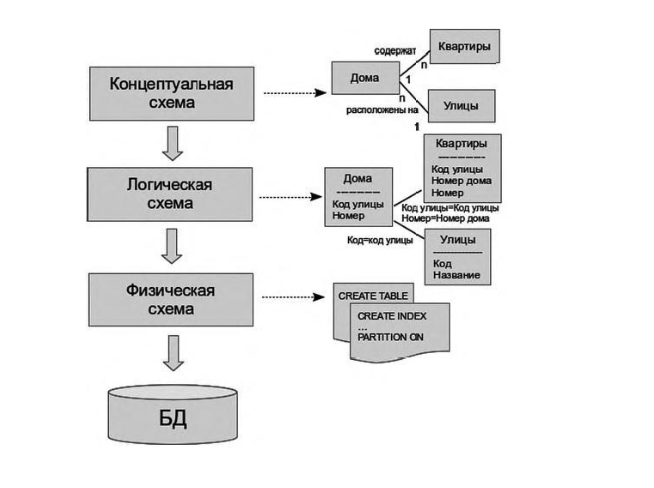

Соответственно, для ясности, под логической структурой понимаются таблицы, под физической — файлы. Такое разделение дает возможность администраторам управлять физической системой хранения, не меняя данных, содержащихся в логической структуре. Например, можно изменить файловое имя базы данных, что не влияет на хранящиеся в ней таблицы.

В первых базах данных данные каждого приложения хранились в отдельной уникальной структуре. Если разработчик хотел создать приложение для использования таких данных, он должен был хорошо знать конкретную структуру, чтобы найти необходимые данные. Такой метод организации был неэффективен, сложен в обслуживании, и затруднял оптимизацию эффективности приложений. Реляционная модель была разработана, чтобы устранить потребность в использовании разнообразных структур данных.

Она обеспечила стандартный способ представления данных и отправки запросов, которые могли быть использованы в любых приложениях. Разработчики уяснили, что таблицы являются ключевым преимуществом реляционных баз данных, так как обеспечивают интуитивно понятный, эффективный и гибкий способ хранения структурированной информации и получения к ней доступа.

Также мы можем отслеживать добавляемые данные для обеспечения структурной целостности. Например, атрибут UNIQUE говорит о том, что значения в столбце не могут повторяться.



##### MySQL установка 
На Linux MySQL устанавливается одной строчкой. На Windows можно установить, следуя данной инструкции.


sudo apt-get update

sudo apt-get install mysql-server

Заходим в MySQL через команду mysql:

sudo mysql

Welcome to the MySQL monitor.  Commands end with ; or\g.

Your MySQL connection id is 4

Server version: 5.7.31-0ubuntu0.18.04.1 (Ubuntu)

Copyright (c) 2000, 2020, Oracle and/or its affiliates. All rights reserved.

Oracle is a registered trademark of Oracle Corporation and/or its
affiliates. Other names may be trademarks of their respective
owners.

Type 'help;' or '\h' for help. Type '\c' to clear the current input statement.

mysql> 

Дальше так же одной строчкой создаем тестовую БД:

mysql> CREATE DATABASE testdb;
Query OK, 1 row affected (0.00 sec)
Устанавливаем её активной БД для дальнейшей работы с ней:

mysql> use testdb;

Database changed

На данный момент у нас есть пустая БД без таблиц, но сейчас мы это исправим с помощью команды CREATE TABLE.

    CREATE TABLE testtable (
        id INT AUTO_INCREMENT PRIMARY KEY,
        title VARCHAR(255) NOT NULL,
        description TEXT
    );
Получаем результат:

    CREATE TABLE testtable (id INT AUTO_INCREMENT PRIMARY KEY,title VARCHAR(255) NOT NULL,description TEXT);
    Query OK, 0 rows affected (0.03 sec)
Что мы получили?


id — это поле, в котором мы храним уникальный идентификатор для каждой созданной строки в таблице;

INT говорит о том, что этот идентификатор — число;

AUTO_INCREMENT — то, что с каждым новым добавлением новой строки он будет возрастать на 1;

PRIMARY KEY  показывает, что это поле — первичный ключ, но об этом в следующем юните.

Рассмотрим 3 и 4 строки запроса выше:


title собственно название второго столбца;

VARCHAR(255)значит, что данное поле состоит из символов не более 255 штук;

NOT NULL — поле должно быть обязательно заполнено при вставке в таблицу, иначе запрос не пройдёт;

description — название третьего столбца

столбец TEXT в большинстве случаев может рассматриваться как столбец VARCHAR неограниченного размера.

Что ж, теперь попробуем добавить в таблицу данные с помощью команды insert:

    mysql> insert testtable(title,description) VALUES ('test1' ,'test2');
    Query OK, 1 row affected (0.01 sec)
    mysql>  insert testtable(title,description) VALUES ('test1111' ,'test22222');
    Query OK, 1 row affected (0.01 sec)
Ну и посмотрим на наши данные:

    mysql> select * from testtable;
    +----+----------+-------------+
    | id | title    | description |
    +----+----------+-------------+
    |  1 | test1    | test2       |
    |  2 | test1111 | test22222   |
    +----+----------+-------------+
    2 rows in set (0.00 sec)
Ограничение UNIQUE гарантирует, что все значения в столбце различаются.

Уникальные и первичные ограничения предоставляют гарантию уникальности для столбца или набора столбцов.

Ограничение первичного ключа автоматически имеет уникальное ограничение. Однако, можно иметь много уникальных ограничений для каждой таблицы, но только одно ограничение первичного ключа для каждой таблицы.

    CREATE TABLE Persons (
        ID int NOT NULL,
        LastName varchar(255) NOT NULL,
        FirstName varchar(255),
        Age int,
        UNIQUE (ID)
    );
    Query OK, 0 rows affected (0.04 sec)
Также мы можем менять данные в таблице с помощью оператора UPDATE.

Оператор UPDATE обновляет столбцы в соответствии с их новыми значениями в строках существующей таблицы. В выражении SET указывается, какие именно столбцы следует модифицировать и какие величины должны быть в них установлены. В выражении WHERE, если оно присутствует, задаётся, какие строки подлежат обновлению.

    mysql> UPDATE testtable SET title="REALTEST" where id =2;
    Query OK, 1 row affected (0.01 sec)
    Rows matched: 1  Changed: 1  Warnings: 0

    mysql> select * from testtable;
    +----+----------+-------------+
    | id | title    | description |
    +----+----------+-------------+
    |  1 | test1    | test2       |
    |  2 | REALTEST | test22222   |
    +----+----------+-------------+
2 rows in set (0.00 sec)



<a id='1'> </a>

#### _Что такое SQL_

> 



---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>

✍ Как вы уже знаете, для взаимодействия с базами данных через СУБД часто используется язык SQL (Structured Query Language). Он применяется для создания, модификации и управления данными.

С его помощью составляются запросы — своего рода вопросы, которые мы задаём, чтобы получить некоторую информацию о данных, хранящихся в БД.

SQL-запрос представляет собой совокупность операторов, инструкций, вычисляемых функций.

Базы данных могут не только возвращать данные, которые вы просите, но и выполнять различные расширенные вычисления.

⭐ Мы начнём с очень простых запросов и будем усложнять их шаг за шагом. К концу этого тематического раздела вы сможете писать достаточно сложные запросы.

---

##### ВИДЫ ОПЕРАТОРОВ SQL

---


##### DDL
операторы определения данных (Data Definition Language, DDL) — с их помощью создаются и изменяются объекты в БД (сама БД, таблицы, функции, процедуры, пользователи и т. д.);

---


##### DML
операторы манипуляции данными (Data Manipulation Language, DML) — с их помощью проводятся манипуляции с данными в таблицах;

---


##### DCL
операторы определения доступа к данным (Data Control Language, DCL) — с их помощью, как следует из названия, создаются и изменяются разрешения на определённые операции с объектами в БД;

---


##### TCL
операторы управления транзакциями (Transaction Control Language, TCL) — с их помощью осуществляется комплекс определённых действий, причём так, что либо все эти действия выполняются успешно, либо ни одно из них не выполняется вообще.

---



#####  Мы будем изучать только DML-операторы (для манипуляций с данными), а конкретнее — оператор SELECT, который позволяет выбрать из БД интересующие нас данные.



Система Управления Базами Данных (СУБД, DBMS — DataBase Management System) — это комплекс программных средств, необходимых для создания структуры новой базы, ее наполнения, редактирования содержимого и отображения информации.

Для работы с данными, хранящимися в БД, используется специальный язык — SQL , который мы и будем изучать в данном курсе.

СУБД бывают разные, и языки для них тоже отличаются, являясь диалектами SQL. Наиболее распространенными СУБД являются MySQL, PostgreSQL, Oracle, Microsoft SQL Server. Для очень большого объёма данных также используют ClickHouse, Hadoop и другие СУБД.

А ЧТО ИСПОЛЬЗУЕТСЯ В ТРЕНАЖЕРЕ?
В качестве нашей учебной СУБД используется PostgreSQL версии 11. Как справочник вы можете использовать англоязычнуюили русскоязычную документацию.

✍ Для написания запросов к БД необходим специальный инструмент. Это может быть терминал в ОС, специализированная программа (например, одна из распространённых — DataGrip) или веб-сервис. Именно такой веб-сервис мы будем использовать.

Чтобы начать работу с Metabase, перейдите по ссылке и подключитесь к учебному аккаунту.




<a id='1'> </a>

### Модуль 2. Основы SQL

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


<a id='1'> </a>

#### _Получаем все данные из таблицы_

> https://www.postgresql.org/docs/11/index.html

> https://postgrespro.ru/docs/postgresql/11/index


---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>

<a id='8'> </a>

### ***

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


<a id='8'> </a>

### ***

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


<a id='8'> </a>

### ***

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


<a id='8'> </a>

### ***

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


<a id='8'> </a>

### ***

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


<a id='8'> </a>

### ***

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


<a id='8'> </a>

### ***

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


<a id='8'> </a>

### ***

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>


<a id='8'> </a>

### ***

---
<span style="font-size:0.8em;"> [TOC](#mod1) </span>
